In [1]:
#importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns 

In [5]:
df=pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Checking the Data Dictionary

In [40]:
set(df["age"])
#looking at the output we came to know it is quantitative Discrete data

{29,
 34,
 35,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 74,
 76,
 77}

In [16]:
set(df["cp"])
#looking at the output we came to know it is quantitative Discrete data

{0, 1, 2, 3}

In [18]:
set(df["trestbps"])
#looking at the output we came to know it is quantitative Discrete data

{94,
 100,
 101,
 102,
 104,
 105,
 106,
 108,
 110,
 112,
 114,
 115,
 117,
 118,
 120,
 122,
 123,
 124,
 125,
 126,
 128,
 129,
 130,
 132,
 134,
 135,
 136,
 138,
 140,
 142,
 144,
 145,
 146,
 148,
 150,
 152,
 154,
 155,
 156,
 160,
 164,
 165,
 170,
 172,
 174,
 178,
 180,
 192,
 200}

In [24]:
set(df["restecg"])
#looking at the output we came to know it is quantitative Discrete data

{0, 1, 2}

In [26]:
set(df["thalach"])
#looking at the output we came to know it is quantitative Discrete data

{71,
 88,
 90,
 95,
 96,
 97,
 99,
 103,
 105,
 106,
 108,
 109,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 177,
 178,
 179,
 180,
 181,
 182,
 184,
 185,
 186,
 187,
 188,
 190,
 192,
 194,
 195,
 202}

In [28]:
set(df["oldpeak"])
#looking at the output we came to know it is quantitative continous data

{0.0,
 0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.4,
 3.5,
 3.6,
 3.8,
 4.0,
 4.2,
 4.4,
 5.6,
 6.2}

In [30]:
set(df["slope"])
#looking at the output we came to know it is quantitative Discrete data

{0, 1, 2}

In [32]:
set(df["ca"])
#looking at the output we came to know it is quantitative Discrete data

{0, 1, 2, 3, 4}

In [34]:
set(df["thal"])
#looking at the output we came to know it is quantitative Discrete data

{0, 1, 2, 3}

In [36]:
set(df["target"])
#looking at the output we came to know it is quantitative Discrete data

{0, 1}

In [48]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: >

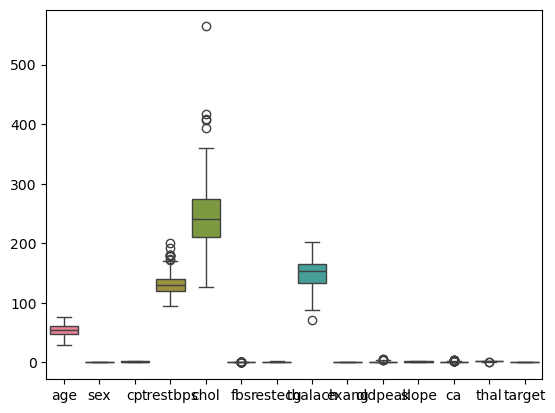

In [74]:
#Feature Engineering 
#Detectting the outliers
sns.boxplot(df)

<Axes: ylabel='trestbps'>

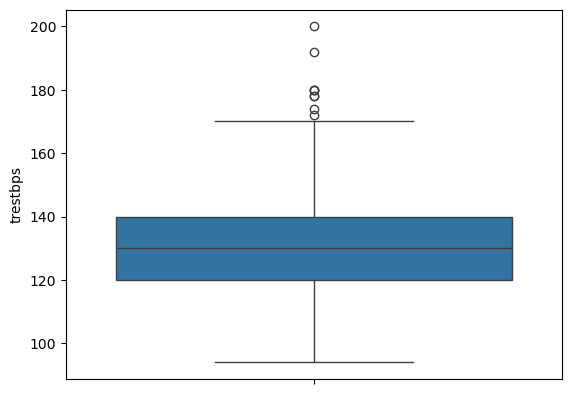

In [72]:
sns.boxplot(df["trestbps"])
#Looking at the output we can see there are outliers

<Axes: ylabel='chol'>

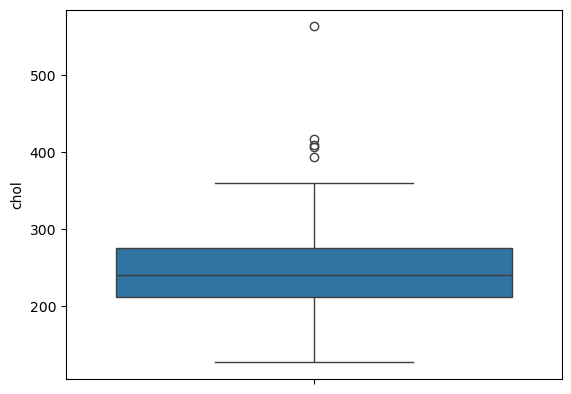

In [58]:
sns.boxplot(df["chol"])
#Looking at the output we can see there are outliers

<Axes: ylabel='oldpeak'>

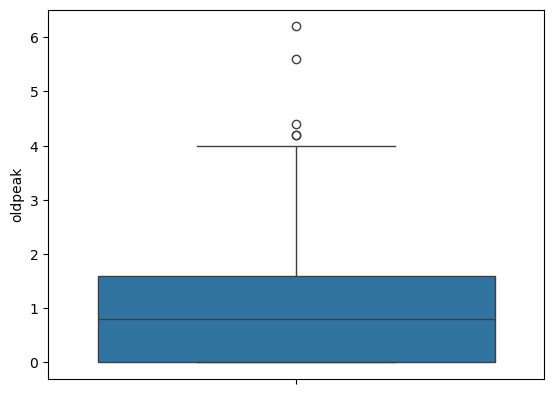

In [70]:
sns.boxplot(df["oldpeak"])
#Looking at the output we can see there are outliers

In [76]:
#Now treating that outliers using trimming 

#For trestbps column
#first we need to calculate IQR
iqr=df.trestbps.quantile(0.75)-df.trestbps.quantile(0.25)
iqr

20.0

In [82]:
#then we need to set loweer limit and upper limit
lower_limit=df.trestbps.quantile(0.25)-1.5*iqr
upper_limit=df.trestbps.quantile(0.75)+1.5*iqr
lower_limit,upper_limit

(90.0, 170.0)

In [84]:
#Trimming for column : trestbps
outliers_df=np.where(df.trestbps>upper_limit,True, np.where(df.trestbps<lower_limit,True,False))
outliers_df


array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [102]:
#you can check the outliers of columns in variable explorer
df_trimmed=df.loc[~outliers_df]
df["trse"]
df.shape


(303, 14)

<Axes: ylabel='trestbps'>

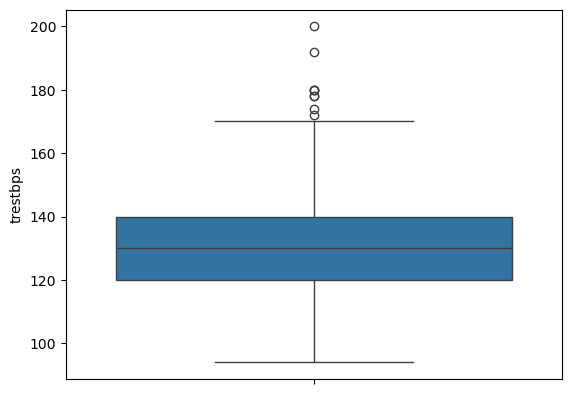

In [104]:
sns.boxplot(df.trestbps)